In [1]:
# globa library
from pandas import read_csv, DataFrame, to_datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

#3 links de ínteres

In [9]:
# Dataframe
df_datagen = read_csv('../DataGeneración_filo.csv')
df_3_trimestre = df_datagen.loc[(df_datagen['Fecha'] >= '2021-07-01') & (df_datagen['Fecha'] < '2021-10-01')]
df_4_trimestre = df_datagen.loc[(df_datagen['Fecha'] >= '2021-10-01') & (df_datagen['Fecha'] < '2022-01-01')]

In [10]:
df_3_trimestre.index = to_datetime(df_3_trimestre['Fecha'])
df_4_trimestre.index = to_datetime(df_4_trimestre['Fecha'])
del df_3_trimestre['Fecha']
del df_4_trimestre['Fecha']


In [12]:
print(df_3_trimestre.head())
print(df_4_trimestre.head())

                           kWh
Fecha                         
2021-07-01 00:00:00  287172.02
2021-07-01 01:00:00  177438.42
2021-07-01 02:00:00  153127.16
2021-07-01 03:00:00  156141.02
2021-07-01 04:00:00  155618.57
                           kWh
Fecha                         
2021-10-01 00:00:00  392050.23
2021-10-01 01:00:00  348848.67
2021-10-01 02:00:00  341031.79
2021-10-01 03:00:00  337203.29
2021-10-01 04:00:00  337888.32


<AxesSubplot:xlabel='Fecha'>

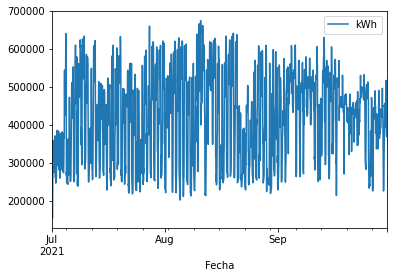

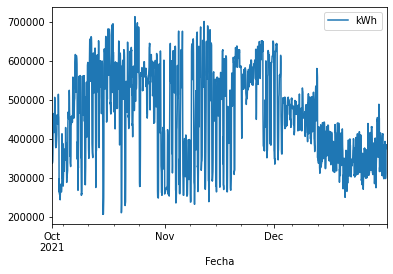

In [13]:
df_3_trimestre.plot()
df_4_trimestre.plot()

In [14]:
df_3_trimestre_day = df_3_trimestre.resample("d").mean()
df_4_trimestre_day = df_4_trimestre.resample("d").mean()

<AxesSubplot:xlabel='Fecha'>

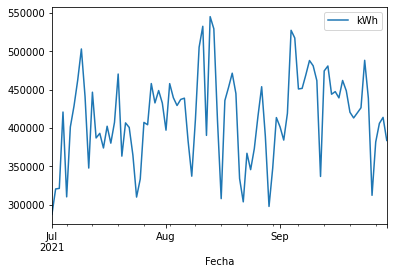

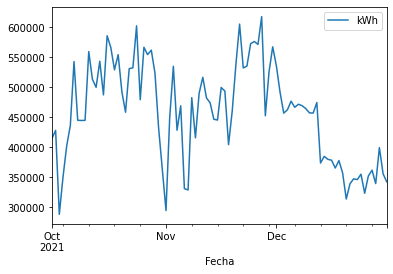

In [15]:
df_3_trimestre_day.plot()
df_4_trimestre_day.plot()

# Stationarity

In [16]:
# tercer trimestre
rolling_mean_3t = df_3_trimestre_day.rolling(7).mean()
rolling_std_3t = df_3_trimestre_day.rolling(7).std()
# cuarto trimestre
rolling_mean_4t = df_4_trimestre_day.rolling(7).mean()
rolling_std_4t = df_4_trimestre_day.rolling(7).std()

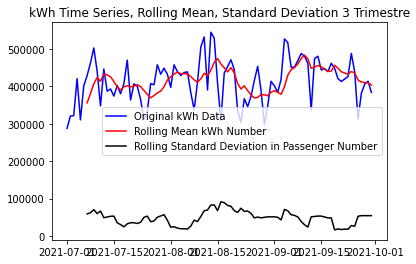

In [19]:
plt.plot(df_3_trimestre_day, color="blue",label="Original kWh Data")
plt.plot(rolling_mean_3t, color="red", label="Rolling Mean kWh Number")
plt.plot(rolling_std_3t, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("kWh Time Series, Rolling Mean, Standard Deviation 3 Trimestre")
plt.legend(loc="best")

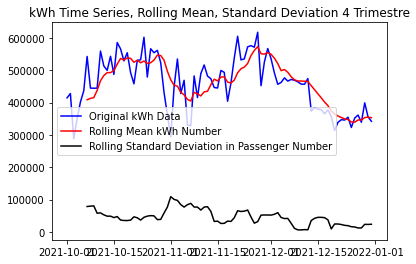

In [20]:
plt.plot(df_4_trimestre_day, color="blue",label="Original kWh Data")
plt.plot(rolling_mean_4t, color="red", label="Rolling Mean kWh Number")
plt.plot(rolling_std_4t, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("kWh Time Series, Rolling Mean, Standard Deviation 4 Trimestre")
plt.legend(loc="best")

In [21]:
adft_3 = adfuller(df_3_trimestre_day,autolag="AIC")
adft_4 = adfuller(df_4_trimestre_day,autolag="AIC")

In [22]:
output_df_3 = DataFrame(
        {"Values":[
            adft_3[0],adft_3[1],adft_3[2],adft_3[3], adft_3[4]['1%'], adft_3[4]['5%'], adft_3[4]['10%']
            ], 
        "Metric":["Test Statistics","p-value","No. of lags used",
        "Number of observations used", 
        "critical value (1%)", "critical value (5%)", "critical value (10%)"]
        }
    )
output_df_4 = DataFrame(
        {"Values":[
            adft_4[0],adft_4[1],adft_4[2],adft_4[3], adft_4[4]['1%'], adft_4[4]['5%'], adft_4[4]['10%']
            ], 
        "Metric":["Test Statistics","p-value","No. of lags used",
        "Number of observations used", 
        "critical value (1%)", "critical value (5%)", "critical value (10%)"]
        }
    )

In [23]:
display(output_df_3)
display(output_df_4)

,Values,Metric
0,-5.852210e+00,Test Statistics
1,3.567467e-07,p-value
2,1.000000e+00,No. of lags used
3,9.000000e+01,Number of observations used
4,-3.505190e+00,critical value (1%)
5,-2.894232e+00,critical value (5%)
6,-2.584210e+00,critical value (10%)


,Values,Metric
0,-1.364793,Test Statistics
1,0.599034,p-value
2,4.000000,No. of lags used
3,87.000000,Number of observations used
4,-3.507853,critical value (1%)
5,-2.895382,critical value (5%)
6,-2.584824,critical value (10%)


# Autocorrelation

In [26]:
autocorrelation_lag1_3 = df_3_trimestre_day['kWh'].autocorr(lag=1)
print("One Day Lag 3T: ", autocorrelation_lag1_3)

autocorrelation_lag1_4 = df_4_trimestre_day['kWh'].autocorr(lag=1)
print("One Day Lag 4T: ", autocorrelation_lag1_4)

One Day Lag 3T:  0.43803762444797845
One Day Lag 4T:  0.7237996077897572


In [27]:
day=3
autocorrelation_lag9_3 = df_3_trimestre_day['kWh'].autocorr(lag=day)
print(f"{day} Day Lag 3T: ", autocorrelation_lag9_3)

autocorrelation_lag9_4 = df_4_trimestre_day['kWh'].autocorr(lag=day)
print(f"{day} Day Lag 4T: ", autocorrelation_lag9_4)

3 Day Lag 3T:  0.06741991877138796
3 Day Lag 4T:  0.529532922115831


# Decomposition

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose